In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.20.0'

In [6]:
from tensorflow import keras

In [7]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [8]:
# LOADING TRAIN AND TEST DATASET (MNIST) Online

mnist = tf.keras.datasets.mnist #Importing MNIST Dataset
(x_train,y_train), (x_test,y_test) = mnist.load_data() #Splitting it into TRAIN and TEST

"""
"""

'\n'

In [9]:
#Convert values to 0 - 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(x_train.shape,y_train.shape)

"""Each pixel value originally ranges from 0 to 255 (grayscale intensity).

Dividing by 255.0 normalizes pixel values to between 0 and 1, improving training performance.

.astype("float32") ensures consistent data type.

The print statement displays dataset dimensions — (60000, 28, 28) and (60000,)."""

(60000, 28, 28) (60000,)


'Each pixel value originally ranges from 0 to 255 (grayscale intensity).\n\nDividing by 255.0 normalizes pixel values to between 0 and 1, improving training performance.\n\n.astype("float32") ensures consistent data type.\n\nThe print statement displays dataset dimensions — (60000, 28, 28) and (60000,).'

In [10]:
#DEFINE NETWORK ARCHITECTURE USING KERAS

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

"""Creates a Sequential neural network — layers are stacked one after another.

Layers:

Flatten: Converts each 28×28 image (2D) into a 784-element vector (1D).

Dense(128, activation="relu"): Fully connected layer with 128 neurons using ReLU (Rectified Linear Unit) activation.

Dense(10, activation="softmax"): Output layer with 10 neurons (for digits 0–9).

softmax outputs probabilities that sum to 1.

model.summary() prints the model structure, parameter count, and layer details"""

C:\Users\Acer\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

'Creates a Sequential neural network — layers are stacked one after another.\n\nLayers:\n\nFlatten: Converts each 28×28 image (2D) into a 784-element vector (1D).\n\nDense(128, activation="relu"): Fully connected layer with 128 neurons using ReLU (Rectified Linear Unit) activation.\n\nDense(10, activation="softmax"): Output layer with 10 neurons (for digits 0–9).\n\nsoftmax outputs probabilities that sum to 1.\n\nmodel.summary() prints the model structure, parameter count, and layer details'

In [11]:
#TRAINING MODEL USING SGD

model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",
             metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

"""compile() prepares the model for training:

optimizer="sgd" → uses Stochastic Gradient Descent for weight updates.

loss="sparse_categorical_crossentropy" → loss function for multi-class classification with integer labels.

metrics=['accuracy'] → tracks accuracy during training.

fit() trains the model:

Uses x_train and y_train data.

validation_data helps monitor performance on unseen test data.

epochs=10 → model trains for 10 complete passes through the dataset.

The result (history) stores accuracy and loss per epoch."""

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8301 - loss: 0.6591 - val_accuracy: 0.9014 - val_loss: 0.3555
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9060 - loss: 0.3363 - val_accuracy: 0.9180 - val_loss: 0.2947
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9193 - loss: 0.2878 - val_accuracy: 0.9257 - val_loss: 0.2602
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9281 - loss: 0.2569 - val_accuracy: 0.9315 - val_loss: 0.2388
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9343 - loss: 0.2336 - val_accuracy: 0.9372 - val_loss: 0.2152
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9399 - loss: 0.2151 - val_accuracy: 0.9401 - val_loss: 0.2041
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9446 - loss: 0.1998 - val_accuracy: 0.9443 - val_loss: 0.1882
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9480 - loss: 0.1865 - 

'compile() prepares the model for training:\n\noptimizer="sgd" → uses Stochastic Gradient Descent for weight updates.\n\nloss="sparse_categorical_crossentropy" → loss function for multi-class classification with integer labels.\n\nmetrics=[\'accuracy\'] → tracks accuracy during training.\n\nfit() trains the model:\n\nUses x_train and y_train data.\n\nvalidation_data helps monitor performance on unseen test data.\n\nepochs=10 → model trains for 10 complete passes through the dataset.\n\nThe result (history) stores accuracy and loss per epoch.'

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9521 - loss: 0.1619
Loss=0.162
Accuracy=0.952


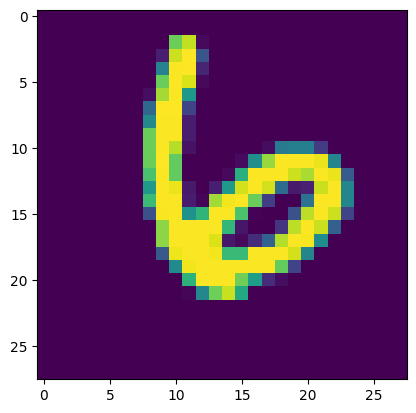

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


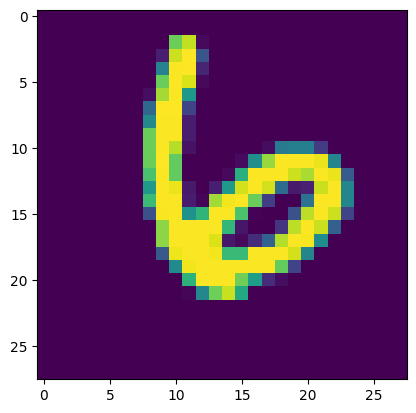

Predicted Values :  6


In [14]:
#EVALUATE THE NETWORK

test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

#test_loss: final loss value on test set.
#test_acc: final accuracy.
#Prints the accuracy to show how well the model performs on unseen data.

n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
#Here, your trained model is asked to predict all 10,000 test images at once.
#So, predicted_value becomes a NumPy array of shape (10000, 10).
plt.imshow(x_test[n])
plt.show()

print("Predicted Values : ", predicted_value[n].argmax())

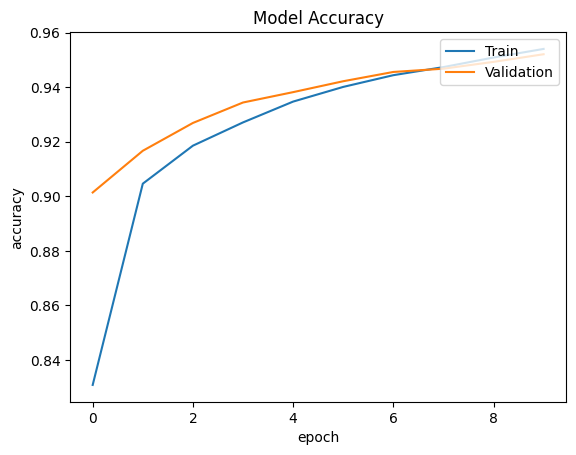

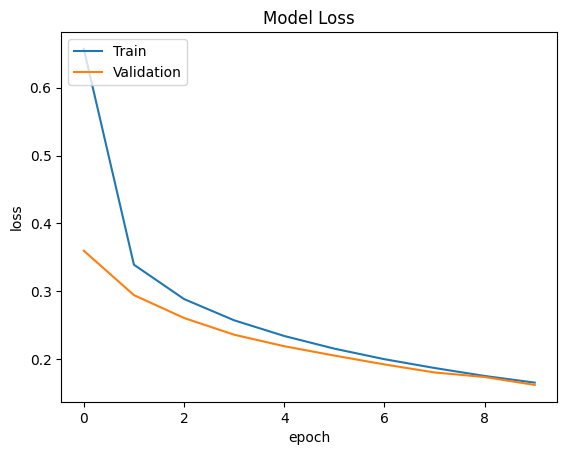

In [15]:
#PLOT TRAINING LOSS AND ACCURACY
#ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()
"""
Blue Line (Train): Accuracy on the training data (x_train)

Orange Line (Validation): Accuracy on unseen test data (x_test)

📈 Interpretation:
Accuracy increases with each epoch — that means the model is learning and improving.

Both lines converge around 0.95 (95%), showing the model is performing well on both training and validation.

The fact that the two lines are close together means there’s no overfitting — the model generalizes well to unseen data."""


#LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

"""
Blue Line (Train): Training loss

Orange Line (Validation): Validation loss

📉 Interpretation:

Both loss values decrease steadily as epochs increase.

Lower loss = better model performance.

The training and validation losses are very close → again, the model is stable and not overfitting.

Early on, training loss is higher (model is just starting to learn).

By the end, both losses drop below 0.2, showing excellent learning progress.
"""

In [ ]:
"""


Imports the Keras API from TensorFlow.

Keras is a high-level library built on top of TensorFlow for building neural networks easily.

x_train, y_train → 60,000 training images and labels.

x_test, y_test → 10,000 testing images and labels.


"""